<a href="https://colab.research.google.com/github/subandwho/tensorflow/blob/main/TranferLearningFineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jul 15 08:04:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-15 08:04:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-15 08:04:34 (81.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import plot_loss_curves, create_tensorboard_callback, unzip_data, walk_through_dir

In [38]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2021-07-15 08:37:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   176MB/s    in 0.9s    

2021-07-15 08:37:23 (176 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [39]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [40]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [41]:
import tensorflow as tf
IMG_SIZE = (224, 224)
EPOCHS = 5
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir, image_size = IMG_SIZE, label_mode = "categorical", batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir, label_mode='categorical', image_size= IMG_SIZE, batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
input = tf.keras.layers.Input(shape = (224, 224, 3), name='Input Layer')
x = base_model(input)
print(f"Shape after base model : {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D()(x)
print(f"Shape after pooling :{x.shape}")
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name="output_layer")(x)
model_0 = tf.keras.Model(input, outputs)
model_0.compile(loss = 'categorical_crossentropy', metrics = ["accuracy"], optimizer = 'Adam')
model0_history = model_0.fit(train_data_10_percent, batch_size = 32, epochs = 5, steps_per_epoch = len(train_data_10_percent), 
                             validation_data = test_data, validation_steps = len(test_data), callbacks = [create_tensorboard_callback(dir_name='transfer_learning_ft', experiment_name = '10_class_transfer_learning')])


16711680/16705208 [==============================] - 0s 0us/step
Shape after base model : (None, 7, 7, 1280)
Shape after pooling :(None, 1280)
Saving TensorBoard log files to: transfer_learning_ft/10_class_transfer_learning/20210715-080449


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
24/24 [==============================] - 59s 811ms/step - loss: 1.8734 - accuracy: 0.4213 - val_loss: 1.3296 - val_accuracy: 0.7008
Epoch 2/5
24/24 [==============================] - 15s 599ms/step - loss: 1.1330 - accuracy: 0.7347 - val_loss: 0.9120 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - 14s 569ms/step - loss: 0.8311 - accuracy: 0.8067 - val_loss: 0.7474 - val_accuracy: 0.8228
Epoch 4/5
24/24 [==============================] - 15s 601ms/step - loss: 0.6853 - accuracy: 0.8307 - val_loss: 0.6594 - val_accuracy: 0.8320
Epoch 5/5
24/24 [==============================] - 24s 1s/step - loss: 0.5869 - accuracy: 0.8667 - val_loss: 0.6075 - val_accuracy: 0.8384


In [9]:
model_0.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 0.6075 - accuracy: 0.8384


[0.607521653175354, 0.8384000062942505]

In [10]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [11]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input Layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


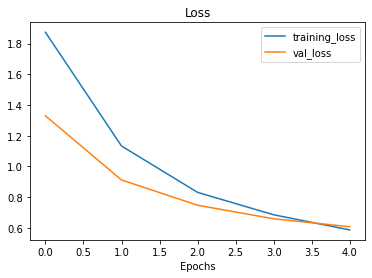

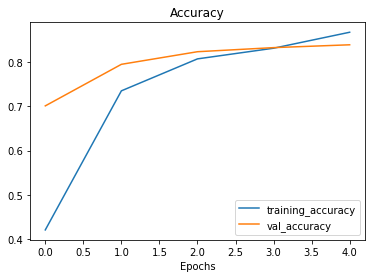

In [12]:
plot_loss_curves(model0_history)

In [22]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2021-07-15 08:09:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   287MB/s    in 0.4s    

2021-07-15 08:09:41 (287 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [23]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There a

In [24]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = '10_food_classes_1_percent/train/',
                                                                 image_size=(224, 224), batch_size=32, label_mode='categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory='10_food_classes_1_percent/test/', image_size=(224, 224),
                                                                batch_size=32, label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [44]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
data_augmented = tf.keras.Sequential([preprocessing.RandomFlip(),
                                      preprocessing.RandomRotation(0.2),
                                      preprocessing.RandomZoom(0.2),
                                      preprocessing.RandomHeight(0.2),
                                      preprocessing.RandomWidth(0.2)], name= 'data_augmentation')

10_food_classes_1_percent/train/fried_rice/230621.jpg


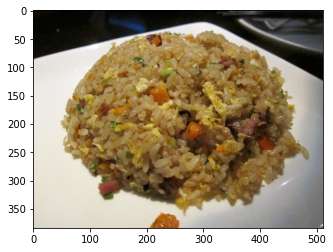

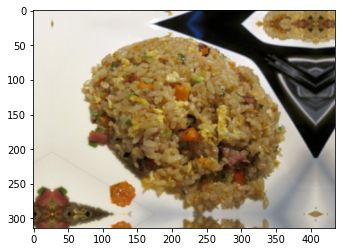

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +'/'+ random_image
print(random_image_path)
img = mpimg.imread(random_image_path)
plt.imshow(img)
img_augment = data_augmented(tf.expand_dims(img, axis = 0))
plt.figure()
plt.imshow(tf.squeeze(img_augment)/255.)

In [48]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
model_x = tf.keras.layers.Input(shape = (224, 224, 3), name = "Input_Layer")
x = data_augmented(model_x)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'Output_Layer')(x)
model_1 = tf.keras.Model(model_x, outputs)
model_1.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data),
                        callbacks=[create_tensorboard_callback(dir_name = "transfer_learning", experiment_name = '1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210715-085220


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
3/3 [==============================] - 16s 5s/step - loss: 2.4039 - accuracy: 0.0857 - val_loss: 2.3374 - val_accuracy: 0.1576
Epoch 2/5
3/3 [==============================] - 10s 5s/step - loss: 2.2411 - accuracy: 0.1429 - val_loss: 2.2278 - val_accuracy: 0.2004
Epoch 3/5
3/3 [==============================] - 9s 5s/step - loss: 1.9933 - accuracy: 0.3429 - val_loss: 2.1280 - val_accuracy: 0.2460
Epoch 4/5
3/3 [==============================] - 9s 4s/step - loss: 1.8806 - accuracy: 0.4286 - val_loss: 2.0324 - val_accuracy: 0.2892
Epoch 5/5
3/3 [==============================] - 9s 4s/step - loss: 1.7475 - accuracy: 0.5429 - val_loss: 1.9406 - val_accuracy: 0.3464


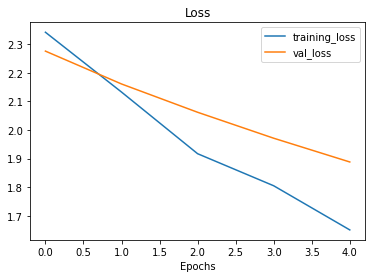

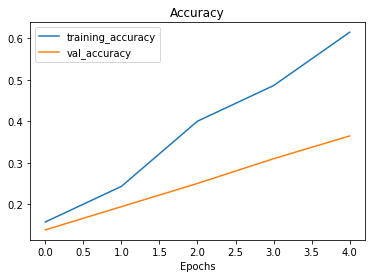

In [36]:
plot_loss_curves(history_1)

In [37]:
results_1_percent_dataaug = model_1.evaluate(test_data)
results_1_percent_dataaug

79/79 [==============================] - 13s 152ms/step - loss: 1.8882 - accuracy: 0.3644


[1.888163685798645, 0.3643999993801117]

In [50]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
data_augmented = tf.keras.Sequential([preprocessing.RandomFlip(),
                                      preprocessing.RandomRotation(0.2),
                                      preprocessing.RandomZoom(0.2),
                                      preprocessing.RandomHeight(0.2),
                                      preprocessing.RandomWidth(0.2)], name= 'data_augmentation')

In [96]:
checkpoint_path = '10_percent_model_checkpoints/checkpoint.ckpt'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, monitor = 'val_loss',
                                                         save_freq = 'epoch', save_weights_only = True, save_best_only = False)

In [113]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
input = tf.keras.layers.Input(shape = (224, 224, 3), name='Input_Layer')
x = data_augmented(input, training = False)
x = base_model(x)

print(f"Shape after base model : {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D()(x)
print(f"Shape after pooling :{x.shape}")
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name="output_layer")(x)
model_2 = tf.keras.Model(input, outputs)
model_2.compile(loss = 'categorical_crossentropy', metrics = ["accuracy"], optimizer = 'Adam')
model2_history = model_2.fit(train_data_10_percent, batch_size = 32, epochs = 5, steps_per_epoch = len(train_data_10_percent), 
                             validation_data = test_data, validation_steps = len(test_data), callbacks = [create_tensorboard_callback(dir_name='transfer_learning_ft', experiment_name = '10_class_transfer_learning'), checkpoint_callback])

Shape after base model : (None, 7, 7, 1280)
Shape after pooling :(None, 1280)
Saving TensorBoard log files to: transfer_learning_ft/10_class_transfer_learning/20210715-100436


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
24/24 [==============================] - 22s 551ms/step - loss: 1.9037 - accuracy: 0.4107 - val_loss: 1.3566 - val_accuracy: 0.6968
Epoch 2/5
24/24 [==============================] - 11s 451ms/step - loss: 1.1506 - accuracy: 0.7400 - val_loss: 0.9311 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - 11s 449ms/step - loss: 0.8456 - accuracy: 0.8080 - val_loss: 0.7601 - val_accuracy: 0.8216
Epoch 4/5
24/24 [==============================] - 11s 449ms/step - loss: 0.6930 - accuracy: 0.8320 - val_loss: 0.6721 - val_accuracy: 0.8296
Epoch 5/5
24/24 [==============================] - 11s 448ms/step - loss: 0.5925 - accuracy: 0.8640 - val_loss: 0.6154 - val_accuracy: 0.8492


In [82]:
model_2.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_15  (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [83]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.6046 - accuracy: 0.8420


[0.6046268343925476, 0.8420000076293945]

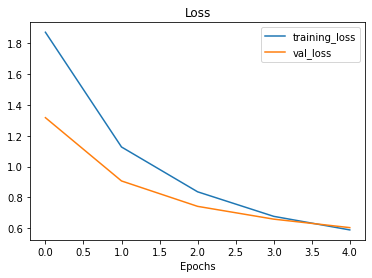

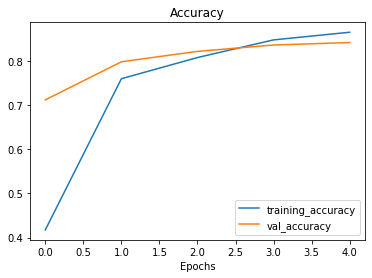

In [84]:
plot_loss_curves(model2_history)

In [112]:
model_2.load_weights(checkpoint_path)

In [111]:
loaded_wts_model_2=model_2.evaluate(test_data)

79/79 [==============================] - 11s 107ms/step - loss: 0.6046 - accuracy: 0.8420


In [110]:
#fine tuning on 10% of existing data


for layer in model_2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fbe1dc07210> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fbea09c50d0> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7fbe1a76e190> True
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fbe1a761f90> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fbea0148090> True


In [88]:
print(len(model_2.layers[2].trainable_variables))

0


In [89]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [93]:
model_2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])
model_2.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_15  (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 906,042
Non-trainable params: 3,156,339
_________________________________________________________________


In [121]:
fine_tune_epochs = 10
history_fine_aug = model_2.fit(train_data_10_percent, 
                              epochs = fine_tune_epochs, 
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              initial_epoch = model2_history.epoch[-1],
                              callbacks = [create_tensorboard_callback(dir_name='transfer_learning_ft_2', experiment_name = '10_class_transfer_learning_aug'), checkpoint_callback]
                              )

Saving TensorBoard log files to: transfer_learning_ft_2/10_class_transfer_learning_aug/20210715-101657
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 18s 727ms/step - loss: 0.5197 - accuracy: 0.8840 - val_loss: 0.5775 - val_accuracy: 0.8508
Epoch 6/10
24/24 [==============================] - 24s 1s/step - loss: 0.4600 - accuracy: 0.8987 - val_loss: 0.5512 - val_accuracy: 0.8508
Epoch 7/10
24/24 [==============================] - 24s 1s/step - loss: 0.4230 - accuracy: 0.9107 - val_loss: 0.5319 - val_accuracy: 0.8524
Epoch 8/10
24/24 [==============================] - 15s 616ms/step - loss: 0.3783 - accuracy: 0.9267 - val_loss: 0.5139 - val_accuracy: 0.8536
Epoch 9/10
24/24 [==============================] - 12s 503ms/step - loss: 0.3486 - accuracy: 0.9320 - val_loss: 0.5013 - val_accuracy: 0.8572
Epoch 10/10
24/24 [==============================] - 12s 494ms/step - loss: 0.3176 - accuracy: 0.9453 - val_loss: 0.4905 - val_accuracy: 0.8560


In [122]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 0.4905 - accuracy: 0.8560


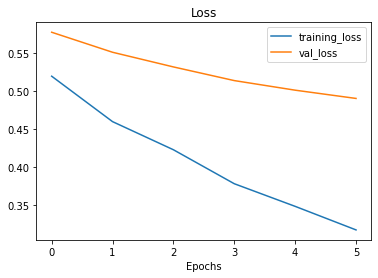

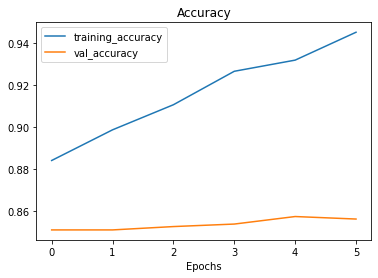

In [123]:
plot_loss_curves(history_fine_aug)


In [131]:
def compare_history(original_history, final_history, initial_epochs=5):
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']
  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']
  total_acc = acc + final_history.history['accuracy']
  total_loss = loss + final_history.history['loss']
  val_total_acc = acc + final_history.history['val_accuracy']
  val_total_loss = loss + final_history.history['val_loss']

  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='Total Accuracy')
  plt.plot(val_total_acc, label='Total Val Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start Fine Tuning")
  plt.legend()
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(val_total_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
   

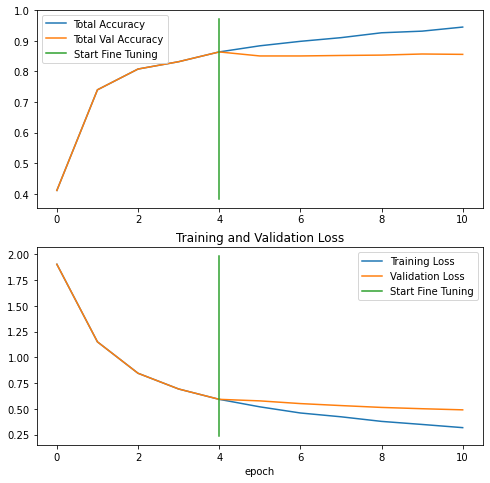

In [132]:
compare_history(model2_history, history_fine_aug, initial_epochs = 5)

In [133]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2021-07-15 10:57:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   160MB/s    in 3.1s    

2021-07-15 10:57:41 (160 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [134]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [135]:
import tensorflow as tf
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(224,224), label_mode = 'categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(224, 224), label_mode = 'categorical')


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [136]:
model_2.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 0.4905 - accuracy: 0.8560


[0.49047303199768066, 0.8560000061988831]

In [137]:
model_2.load_weights(checkpoint_path)

In [138]:
model_2.evaluate(test_data)

79/79 [==============================] - 13s 153ms/step - loss: 0.4905 - accuracy: 0.8560


[0.49047303199768066, 0.8560000061988831]

In [142]:
model_2.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(0.0001),
                metrics = ['accuracy'])
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full, epochs = 10, initial_epoch = model2_history.epoch[-1],
                              callbacks = [create_tensorboard_callback(dir_name='transfer_learning', experiment_name = '10_class_transfer_learning_full'), checkpoint_callback]
                              , validation_data = test_data, validation_steps = len(test_data))

Saving TensorBoard log files to: transfer_learning/10_class_transfer_learning_full/20210715-111922
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 44s 154ms/step - loss: 0.5963 - accuracy: 0.8207 - val_loss: 0.4575 - val_accuracy: 0.8664
Epoch 6/10
235/235 [==============================] - 34s 144ms/step - loss: 0.5650 - accuracy: 0.8257 - val_loss: 0.4367 - val_accuracy: 0.8728
Epoch 7/10
235/235 [==============================] - 34s 144ms/step - loss: 0.5427 - accuracy: 0.8364 - val_loss: 0.4209 - val_accuracy: 0.8756
Epoch 8/10
235/235 [==============================] - 34s 144ms/step - loss: 0.5256 - accuracy: 0.8400 - val_loss: 0.4085 - val_accuracy: 0.8788
Epoch 9/10
235/235 [==============================] - 34s 144ms/step - loss: 0.5111 - accuracy: 0.8453 - val_loss: 0.3985 - val_accuracy: 0.8796
Epoch 10/10
235/235 [==============================] - 34s 144ms/step - loss: 0.4956 - accuracy: 0.8515 - val_loss: 0.3888 - val_accuracy: 0.8820


In [143]:
results_fine_tune_full_data = model_2.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 0.3888 - accuracy: 0.8820
